In [7]:
import numpy as np
import pandas as pd
import arviz as az
from scipy.spatial import KDTree
import h5py
import scipy
from scipy.stats import ks_2samp
from scipy.optimize import brentq
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import curve_fit
from scipy import interpolate
from astropy.cosmology import Planck13, z_at_value
from itertools import product
import sys
from scipy.special import erf
import time
import numpy as np
import scipy.ndimage
#from scipy.misc import logsumexp 
import itertools
from scipy.interpolate import interp1d,interp2d
from astropy.cosmology import Planck13, z_at_value
from scipy.special import gamma, gammainc
from scipy.stats import scoreatpercentile
import astropy.units as u
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from numpy.random import choice
import astropy.cosmology as cosmo
import matplotlib as mpl
import matplotlib.ticker as mtick
import emcee
import pickle
import corner
from scipy import stats
from scipy.stats import poisson
plt.style.use('classic')
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.ticker import FormatStrFormatter
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.integrate import simps
from scipy.optimize import brentq
import matplotlib.dates as mdates
import sys
import os
import seaborn as sns
import datetime
from tslearn.clustering import TimeSeriesKMeans
params = {'legend.fontsize': 'large',
        'figure.figsize': (6, 6),
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'large',
        'ytick.labelsize':'large'}
pylab.rcParams.update(params)
from matplotlib import rc
rc('font',**{'family':'Times New Roman'})



In [3]:
df=pd.read_csv('temp_datalab_records_linkedin_company.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### total number of companies presented in this dataset:

In [4]:
np.unique(df['company_name']).size

5028

In [5]:
all_company_names=np.unique(df['company_name'])

In [47]:
df

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426191,902985,2018-07-17,"Diversified Restaurant Holdings, Inc (Nasdaq: ...",488,89,https://www.linkedin.com/company/428083,Restaurants,2018-07-17 17:17:08.8897+00,2018-07-17 17:17:08.889725+00,NaN,http://www.diversifiedrestaurantholdings.com,NaN,NaN,NaN
2426192,903052,2018-07-17,First Financial Northwest Bank,785,118,https://www.linkedin.com/company/497673,Banking,2018-07-17 15:54:35.807059+00,2018-07-17 15:54:35.807085+00,NaN,http://www.ffnwb.com,NaN,NaN,NaN
2426193,902948,2018-07-17,DMC Global Inc.,1521,184,https://www.linkedin.com/company/586890,Oil & Energy,2018-07-17 13:44:19.302482+00,2018-07-17 13:44:19.302508+00,NaN,http://www.dmcglobal.com,NaN,NaN,NaN
2426194,910210,2018-07-17,ServiceSource,27963,2496,https://www.linkedin.com/company/11889,Information Technology and Services,2018-07-17 17:28:48.430667+00,2018-07-17 17:28:48.430717+00,NaN,http://www.servicesource.com,NaN,NaN,NaN


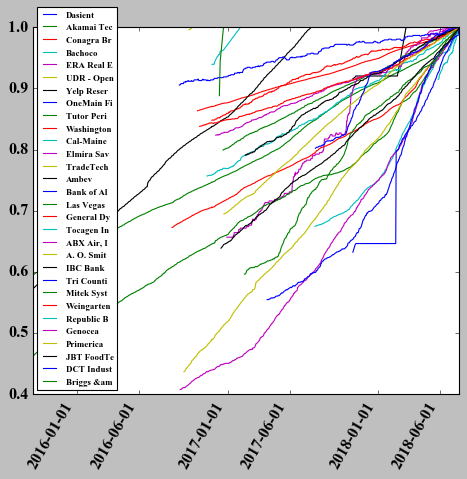

In [130]:
# plot the subscriber numbers as a function of time for 30 randomly selected company 
fig,ax=plt.subplots(1,1)
for ii in range(0,30):
    pp=np.random.randint(5000)
    company=all_company_names[pp]
    GS_follower_count=df['followers_count'][df['company_name']==company]
    GS_follower_count_date=df['as_of_date'][df['company_name']==company]
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in GS_follower_count_date]
    y_values=GS_follower_count.values
    ax.plot(x_values,y_values/y_values.max(),label=company[:10])

#ax.set_yscale('log')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator((1,6)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
ax.legend(loc=3, prop={'size': 8})
plt.tight_layout()
plt.show()

In [60]:
#choose companies with long records dating back to Sep 2015
#Those companies have their end dates in 2018
long_ts_companies=[]
counts=0
while counts<100:
    pp=np.random.randint(5000)
    company=all_company_names[pp]
    #company='Goldman Sachs'
    GS_follower_count=df['followers_count'][df['company_name']==company]
    GS_follower_count_date=df['as_of_date'][df['company_name']==company]
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in GS_follower_count_date]
    #select comapnies with records dating from 2015-9-18 till 2018-07-17
    if ((x_values[-1].year==2018)&(x_values[0].year==2015)&(x_values[0].month==9)&(x_values[0].day<=20)):
        print(company)
        counts+=1
        long_ts_companies.append(company)



NetEase
Lowe's Companies, Inc.
Valero Energy Corporation
Marathon Petroleum Corporation
Tyson Foods
Exelon
The AES Corporation
Brixmor Property Group
Dropbox
Comerica Bank
NetEase
PepsiCo
VF Corporation
NetApp
Apache Corporation
UnitedHealth Group
The Coca-Cola Company
Alcoa
Akamai Technologies
John Deere
Alkermes
Enbridge
Johnson & Johnson
Nasdaq
WisdomTree Asset Management
Cummins Inc.
Bristol-Myers Squibb
Apple
Public Storage
T-Mobile
Atossa Genetics, Inc.
Prudential Financial
Long John Silver's, LLC
Devon Energy
GSK
Weight Watchers
The Dow Chemical Company
Nielsen
C.H. Robinson
Starbucks
Macerich
Target
C.H. Robinson
Southwestern Energy
Harley-Davidson Motor Company
RadNet
NVIDIA
Vodafone
Morgan Stanley
FMC Technologies
Asbury Automotive Group
DaVita Kidney Care
Apple
Google
U.S. Bank
The Walt Disney Company
Mallinckrodt Pharmaceuticals
Intercontinental Exchange
PulteGroup
L Brands
Google
BNY Mellon
Alleghany Corporation
Asbury Automotive Group
Kohl's Department Stores
O'Reilly Aut

In [66]:
np.savetxt('list_of_companies_with_long_records.dat',np.array(long_ts_companies),fmt='%s')

In [88]:
ts_dataset=np.ones(100*1000*1).reshape(100,1000,1)
for ii,company in enumerate(long_ts_companies):
    GS_follower_count=df['followers_count'][df['company_name']==company]
    GS_follower_count_date=df['as_of_date'][df['company_name']==company]
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in GS_follower_count_date]
    starting_point=len(GS_follower_count)-1000 # to enforce all have the same length and roughly the same starting date
    if starting_point<0:continue
    ts_dataset[ii,:,0]=GS_follower_count[starting_point:]

In [104]:
#remove rows that are empty (here all entries being =1.0)
for ii in range(0,100):
    if ts_dataset[ii,0,0]==1.0:
        print(ii)

22
64
89


In [109]:
modified_ts_dataset=np.delete(ts_dataset,[22,64,89],0)

In [112]:
modified_ts_dataset.shape

(97, 1000, 1)

In [143]:
long_ts_companies_=np.delete(np.array(long_ts_companies),[22,64,89],0)

In [145]:
np.savetxt('list_of_companies_with_long_records.dat',np.array(long_ts_companies_),fmt='%s')

In [ ]:
#scale the ts_count dataset
for i in range(0,modified_ts_dataset.shape[0]):
    modified_ts_dataset[i,:,0]=modified_ts_dataset[i,:,0]/modified_ts_dataset[i,:,0].max()

In [118]:
#down sample the data series from 1000 data points to 100 to boost the computation speed
down_sampled_ts_dataset=np.ones(97*100*1).reshape(97,100,1)
for i in range(0,97):
    down_sampled_ts_dataset[i,:,0]=modified_ts_dataset[i,::10,0]

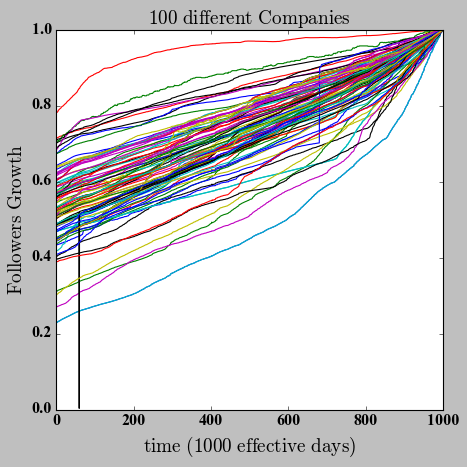

In [126]:
fig,ax=plt.subplots(1,1)
for i in range(0,modified_ts_dataset.shape[0]):
    ax.plot(modified_ts_dataset[i,:,0])
ax.set_ylabel(r'$\rm Followers~Growth$')
ax.set_xlabel(r'$\rm time~(1000~effective~days)$')
ax.set_title(r'$\rm 100~different~Companies$')
plt.tight_layout()
fig.savefig('Growth_100_companies.pdf')

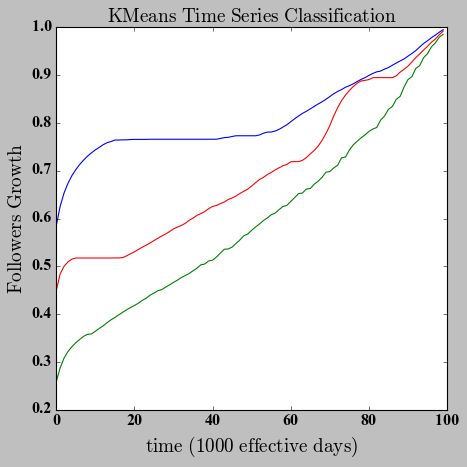

In [139]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,random_state=0).fit(down_sampled_ts_dataset)
fig,ax=plt.subplots(1,1)
for i in range(0,3):
    ax.plot(km.cluster_centers_[i])
ax.set_ylabel(r'$\rm Followers~Growth$')
ax.set_xlabel(r'$\rm time~(1000~effective~days)$')
ax.set_title(r'$\rm KMeans~Time~Series~Classification$')
plt.tight_layout()
fig.savefig('ts_classification_dtw.pdf')

In [167]:
km_predictions = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,random_state=0).fit_predict(down_sampled_ts_dataset)
print(km_predictions)

[1 0 2 2 2 0 2 2 0 0 1 0 2 0 0 2 2 0 0 2 2 0 1 0 0 0 0 2 0 0 2 2 0 0 0 2 2
 2 0 0 0 2 0 2 0 2 2 0 0 2 2 0 2 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1 2 2 2 2 2 0
 0 1 2 0 2 2 0 0 2 2 2 0 0 2 2 0 0 2 2 2 0 0 2]
1.0


#### Percentage of variance explained by data
#### This means only two of the above eigen time_series are responsible to explain the data

In [175]:
Percentage of variance explained by data
print(len(km_predictions[km_predictions==0])/len(km_predictions)*100)
print(len(km_predictions[km_predictions==1])/len(km_predictions)*100)
print(len(km_predictions[km_predictions==2])/len(km_predictions)*100)

47.42268041237113
5.154639175257731
47.42268041237113


In [147]:
N_companies=long_ts_companies_.size
ts_dataset_employees=np.ones(N_companies*1000*1).reshape(N_companies,1000,1)
for ii,company in enumerate(long_ts_companies_):
    GS_follower_count=df['employees_on_platform'][df['company_name']==company]
    GS_follower_count_date=df['as_of_date'][df['company_name']==company]
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in GS_follower_count_date]
    starting_point=len(GS_follower_count)-1000 # to enforce all have the same length and roughly the same starting date
    ts_dataset_employees[ii,:,0]=GS_follower_count[starting_point:]

In [152]:
#scale the ts_count dataset
for i in range(0,modified_ts_dataset.shape[0]):
    ts_dataset_employees[i,:,0]=ts_dataset_employees[i,:,0]/ts_dataset_employees[i,:,0].max()
#down sample the data series from 1000 data points to 100 to boost the computation speed
down_sampled_ts_dataset_employees=np.ones(97*100*1).reshape(97,100,1)
for i in range(0,97):
    down_sampled_ts_dataset_employees[i,:,0]=ts_dataset_employees[i,::10,0]

In [153]:
down_sampled_ts_dataset_employees.shape

(97, 100, 1)

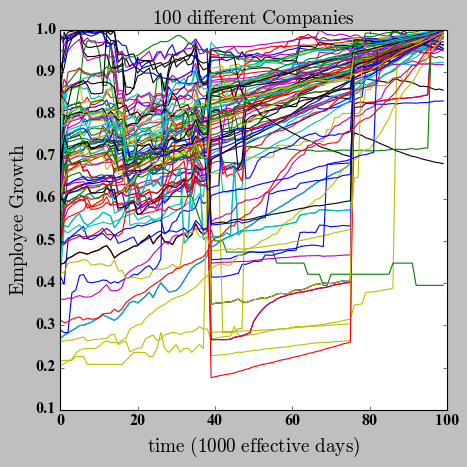

In [154]:
fig,ax=plt.subplots(1,1)
for i in range(0,ts_dataset_employees.shape[0]):
    ax.plot(down_sampled_ts_dataset_employees[i,:,0])
ax.set_ylabel(r'$\rm Employee~Growth$')
ax.set_xlabel(r'$\rm time~(1000~effective~days)$')
ax.set_title(r'$\rm 100~different~Companies$')
plt.tight_layout()
fig.savefig('employee_count_100_companies.pdf')

### Percentage of variance explained by data in eployees count time series
### This means only two of the above eigen time_series are responsible to explain the data

In [192]:
km_predictions_employees = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=5,random_state=0).fit_predict(down_sampled_ts_dataset_employees)
print(km_predictions_employees)

[0 1 1 1 1 2 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 0 3 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 2 1 0 0 1 2 1 2 1 2 0 1 0 2 1 0 2 1 0 0 1 2 1 0 1
 2 0 1 2 1 1 1 1 2 2 0 1 1 1 1 1 1 1 1 0 1 1 1]


In [193]:
print(len(km_predictions_employees[km_predictions_employees==0])/len(km_predictions_employees)*100)
print(len(km_predictions_employees[km_predictions_employees==1])/len(km_predictions_employees)*100)
print(len(km_predictions_employees[km_predictions_employees==2])/len(km_predictions_employees)*100)
print(len(km_predictions_employees[km_predictions_employees==3])/len(km_predictions_employees)*100)

21.649484536082475
63.91752577319587
13.402061855670103
1.0309278350515463


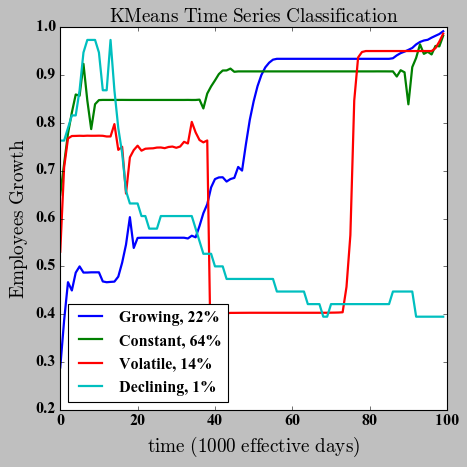

In [195]:
km_employees = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=5,random_state=0).fit(down_sampled_ts_dataset_employees)
fig,ax=plt.subplots(1,1)
labels=['Growing, 22%','Constant, 64%','Volatile, 14%','Declining, 1%']
for i in range(0,4):
    ax.plot(km_employees.cluster_centers_[i],label=labels[i],lw=2)
ax.set_ylabel(r'$\rm Employees~Growth$')
ax.set_xlabel(r'$\rm time~(1000~effective~days)$')
ax.set_title(r'$\rm KMeans~Time~Series~Classification$')
ax.legend(loc=3)
plt.tight_layout()
fig.savefig('ts_classification_dtw_employees.pdf')

### is there a correlation between the follower's growth and company's employee's growth?
### the following plot shows that there is no such correlation. 
### As more or less the data points in each category is distributed based on their frequency. 

(-0.1, 3.1)

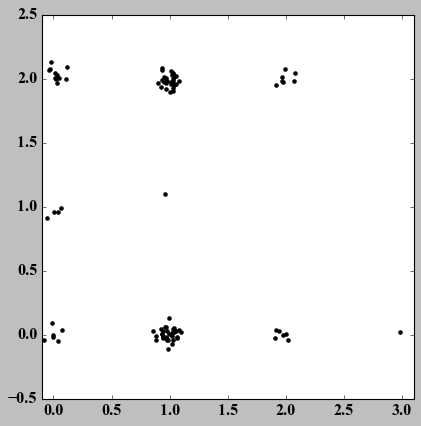

In [196]:
fig,ax=plt.subplots(1,1)
ax.plot(np.array(km_predictions_employees)+np.random.normal(0,.05,km_predictions_employees.size),\
        np.array(km_predictions)+np.random.normal(0,.05,km_predictions.size),'.k',ms=7)
ax.set_xlim(-.1,3.1)

### Another question that we can not explore with this data set is the correlation between stock price and emplyee count. Another question we can ask is of those companies focusing on the same industry, such as banking, what is the variance of employee growth. 
### for this we first need to find all types of industies:

In [213]:
all_company_industries=np.unique(df['industry'].values)

TypeError: '<' not supported between instances of 'float' and 'str'

### We see that the command fails since the data includes a mix of floats and string in the names. 
### We need some preprocessing to get around this. 

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [219]:
df['industry'] = le.fit_transform(df['industry'].astype(str))

In [ ]:
### this reads the industries in str format and encodes them into numbers.
### We have to inverse transform this to get back the names of the industires

In [225]:
all_company_industries_coded_in_number=np.unique(df['industry'].values)

In [226]:
all_company_industries=le.inverse_transform(all_company_industries_coded_in_number)

In [227]:
for industries in all_company_industries:
    if 'Bank' in industries:
        print(industries)

Banking
Investment Banking


In [242]:
inversed_industry_names=le.inverse_transform(df['industry'])
all_banking_companies=[]
for company in all_company_names:
    index=(df['company_name']==company).nonzero()[0]
    if ((inversed_industry_names[index[0]]=='Banking') or (inversed_industry_names[index[0]]=='Investment Banking')):
        print(company)
    all_banking_companies.append(company)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


1st Security Bank of Washington
1st Source Bank
ACNB Bank
Access National Bank
Alliance Association Bank
Alliance Bank of Arizona
AmTrust Bank, A Division of New York Community Bank
AmeriServ Financial Bank
American River Bank
American Savings Bank
Ameris Bank
Anchor Bank WA
Arizona Bank & Trust
Arizona Bank &amp; Trust
Atlantic Capital Bank
Atlantic Stewardship Bank
AuburnBank
BBCN Bank
BBVA
BBVA Banco Frances
BBVA Compass
BCB Community Bank
BLADEX
BMO Harris Bank
BNB
BNB Bank
BOK Financial
Banc of California
BancFirst
Banco Macro
Banco Popular de Puerto Rico
Banco Santander
Banco Santander Chile
Banco Santander Mexico
Banco de Chile
Banco de Occidente
Bancolombia
Bank Midwest
Bank of Albuquerque
Bank of America
Bank of Arizona
Bank of Arkansas
Bank of Commerce Holdings
Bank of Hawaii
Bank of Marin
Bank of Nevada
Bank of Oklahoma
Bank of Texas
Bank of The James
Bank of the Sierra
BankFinancial
BankUnited
Bankwell
Banner Bank
Belmont Savings Bank
Beneficial Bank
Berkshire Bank
BofI Fed

In [ ]:
np.savetxt('all_banking_companies.dat',np.array(all_banking_companies))

In [256]:
names_of_banking_companies=[]
with open('all_banking_companies.dat','r') as f:
    while f.readline(): 
        names_of_banking_companies.append(f.readline().strip())

In [263]:
df=pd.read_csv('temp_datalab_records_linkedin_company.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [269]:
N_companies=len(names_of_banking_companies)
banking_ts_dataset_employees=np.ones(N_companies*100*1).reshape(N_companies,100,1)
for ii,company in enumerate(names_of_banking_companies):
    all_employees_count=df['employees_on_platform'][df['company_name']==company]
    all_employees_count_date=df['as_of_date'][df['company_name']==company]
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in GS_follower_count_date]
    print(x_values[0],x_values[-1],len(x_values),company)
    #starting_point=len(GS_follower_count)-1000 # to enforce all have the same length and roughly the same starting date
    #ts_dataset_employees[ii,:,0]=GS_follower_count[starting_point:]

2016-11-25 2018-07-17 595 1st Source Bank
2016-11-27 2018-07-17 594 Access National Bank
2016-09-12 2018-07-17 666 Alliance Bank of Arizona
2016-12-05 2018-07-17 586 AmeriServ Financial Bank
2016-09-14 2018-07-17 668 American Savings Bank
2016-12-05 2018-07-17 586 Anchor Bank WA
2016-11-21 2017-02-01 19 Arizona Bank &amp; Trust
2017-04-08 2018-07-17 463 Atlantic Stewardship Bank
2016-11-18 2018-07-17 602 BBCN Bank
2018-06-12 2018-07-17 35 BBVA Banco Frances
2016-12-24 2018-07-17 567 BCB Community Bank
2017-06-29 2018-07-17 381 BMO Harris Bank
2018-01-04 2018-07-17 194 BNB Bank
2016-11-18 2018-07-17 602 Banc of California
2016-12-10 2018-07-17 580 Banco Macro
2015-09-16 2018-07-17 1015 Banco Santander
2016-12-16 2018-07-17 574 Banco Santander Mexico
2018-06-27 2018-07-17 21 Banco de Occidente
2016-11-23 2018-07-17 598 Bank Midwest
2015-09-16 2018-07-17 1017 Bank of America
2016-09-06 2018-07-17 676 Bank of Arkansas
2016-09-15 2018-07-17 666 Bank of Hawaii
2016-09-12 2018-07-17 666 Bank 

IndexError: list index out of range

#### this shows that not all of the companies involved in banking business have the same length of records on their LinkedIn.
#### therefore, to to clustering we need to make them the same size.
#### here I use the resample_poly of Scipy.signal package and sample down the signals so all have a length of 100. 

In [303]:
from scipy.signal import resample

In [310]:
testing=df['employees_on_platform'][df['company_name']=='Evercore'].values

In [311]:
testing_=resample(testing,100)

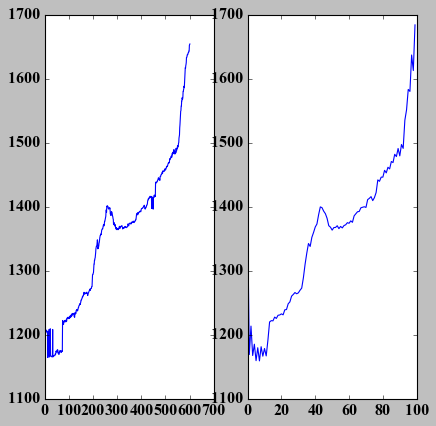

In [312]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(testing)
ax2.plot(testing_)

In [323]:
N_companies=len(names_of_banking_companies)
banking_ts_dataset_employees=np.ones(N_companies*100*1).reshape(N_companies,100,1)
for ii,company in enumerate(names_of_banking_companies):
    all_employees_count=df['employees_on_platform'][df['company_name']==company]
    all_employees_count_date=df['as_of_date'][df['company_name']==company]
    x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in all_employees_count_date]
    print(x_values[0],x_values[-1],len(x_values),company)
    if len(all_employees_count)<500:continue
    all_employees_count/=all_employees_count.max()
    banking_ts_dataset_employees[ii,:,0]=resample(all_employees_count,100)

2016-11-25 2018-07-17 595 1st Source Bank
2016-11-27 2018-07-17 594 Access National Bank
2016-09-12 2018-07-17 666 Alliance Bank of Arizona
2016-12-05 2018-07-17 586 AmeriServ Financial Bank
2016-09-14 2018-07-17 668 American Savings Bank
2016-12-05 2018-07-17 586 Anchor Bank WA
2016-11-21 2017-02-01 19 Arizona Bank &amp; Trust
2017-04-08 2018-07-17 463 Atlantic Stewardship Bank
2016-11-18 2018-07-17 602 BBCN Bank
2018-06-12 2018-07-17 35 BBVA Banco Frances
2016-12-24 2018-07-17 567 BCB Community Bank
2017-06-29 2018-07-17 381 BMO Harris Bank
2018-01-04 2018-07-17 194 BNB Bank
2016-11-18 2018-07-17 602 Banc of California
2016-12-10 2018-07-17 580 Banco Macro
2015-09-16 2018-07-17 1015 Banco Santander
2016-12-16 2018-07-17 574 Banco Santander Mexico
2018-06-27 2018-07-17 21 Banco de Occidente
2016-11-23 2018-07-17 598 Bank Midwest
2015-09-16 2018-07-17 1017 Bank of America
2016-09-06 2018-07-17 676 Bank of Arkansas
2016-09-15 2018-07-17 666 Bank of Hawaii
2016-09-12 2018-07-17 666 Bank 

IndexError: list index out of range

In [324]:
#cleaning out those companies that had less than 500 entries
index_to_be_deleted=[]
for ii in range(0,banking_ts_dataset_employees.shape[0]):
    if banking_ts_dataset_employees[ii,0,0]==1.0:
        index_to_be_deleted.append(ii)

In [325]:
banking_ts_dataset_employees_final=np.delete(banking_ts_dataset_employees,index_to_be_deleted,0)

#### now we have a clean dataset to feed into the clustering algorithm

In [328]:
km_predictions_employees = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=5,random_state=0).fit_predict(banking_ts_dataset_employees_final)
print(km_predictions_employees)
print(len(km_predictions_employees[km_predictions_employees==0])/len(km_predictions_employees)*100)
print(len(km_predictions_employees[km_predictions_employees==1])/len(km_predictions_employees)*100)
print(len(km_predictions_employees[km_predictions_employees==2])/len(km_predictions_employees)*100)
print(len(km_predictions_employees[km_predictions_employees==3])/len(km_predictions_employees)*100)

[2 2 2 1 2 2 3 0 2 2 0 2 2 2 2 2 2 1 1 0 2 2 1 2 2 2 1 2 2 2 3 1 1 2 1 3 1
 1 2 2 1 2 2 2 0 2 1 2 0 1 2 1 1 2 1 2 2 0 1 2 1 2 1 1 2 0 2 1 2 0 2 0 0 0
 2 1 1 1 2 2 1 1 2 1 1 2 2 1 2 1 0 1 1 0 1 0 2 1 2 0 0 2 2 0 1 1 2 1 1 2 0
 2]
16.071428571428573
33.92857142857143
47.32142857142857
2.6785714285714284


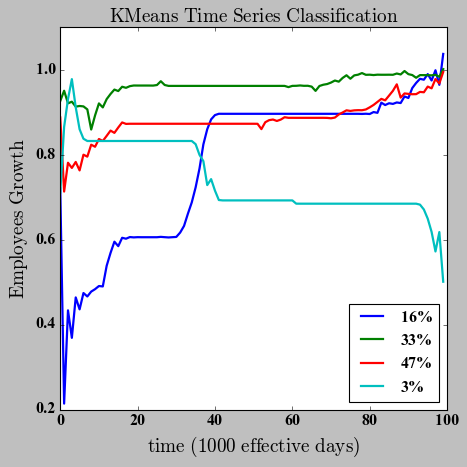

In [331]:
km_employees = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=5,random_state=0).fit(banking_ts_dataset_employees_final)
fig,ax=plt.subplots(1,1)
labels=['16%','33%','47%','3%']
for i in range(0,4):
    ax.plot(km_employees.cluster_centers_[i],label=labels[i],lw=2)
ax.set_ylabel(r'$\rm Employees~Growth$')
ax.set_xlabel(r'$\rm time~(1000~effective~days)$')
ax.set_title(r'$\rm KMeans~Time~Series~Classification$')
ax.legend(loc=4)
plt.tight_layout()
fig.savefig('ts_classification_dtw_employees_banking.pdf')

#### these results are similar to what we obtained by randomly selecting companies from the database without regards to their businesses. 
#### therefore one can conclude that the statistics of employment growth in banking industry is a fair representation of the economy as a whole.